## Analyze learning

### Pendulum v0

* Observations : cos(theta)(-1, 1), sin(theta)(-1, 1), theta dot(-8,8)
* Action : torque(-2, 2) 

In [8]:
# load actor model
import os
import gym
import torch
import numpy as np
import math

from model import Actor
from easydict import EasyDict as edict

args = edict({'hidden_size':128})
env=gym.make('Pendulum-v0')
env.seed(10)
torch.manual_seed(10)

state_size = env.observation_space.shape[0]
action_size = env.action_space.shape[0]

path = "./save_model/Pendulum/actor/"
path_list = os.listdir(path)
actor_list = []
for file in path_list:
    actor = Actor(state_size, action_size, args).float()
    actor_list.append(actor.load_state_dict(torch.load(path+file)))


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Learning Curve

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_path = "./csv_log/Pendulum/return/"
csv_path_list = os.listdir(csv_path)

pd_list = []

for file in csv_path_list:
    pd_data = pd.read_csv(csv_path+file)
    pd_list.append(pd_data)
    
result = pd.concat(pd_list)


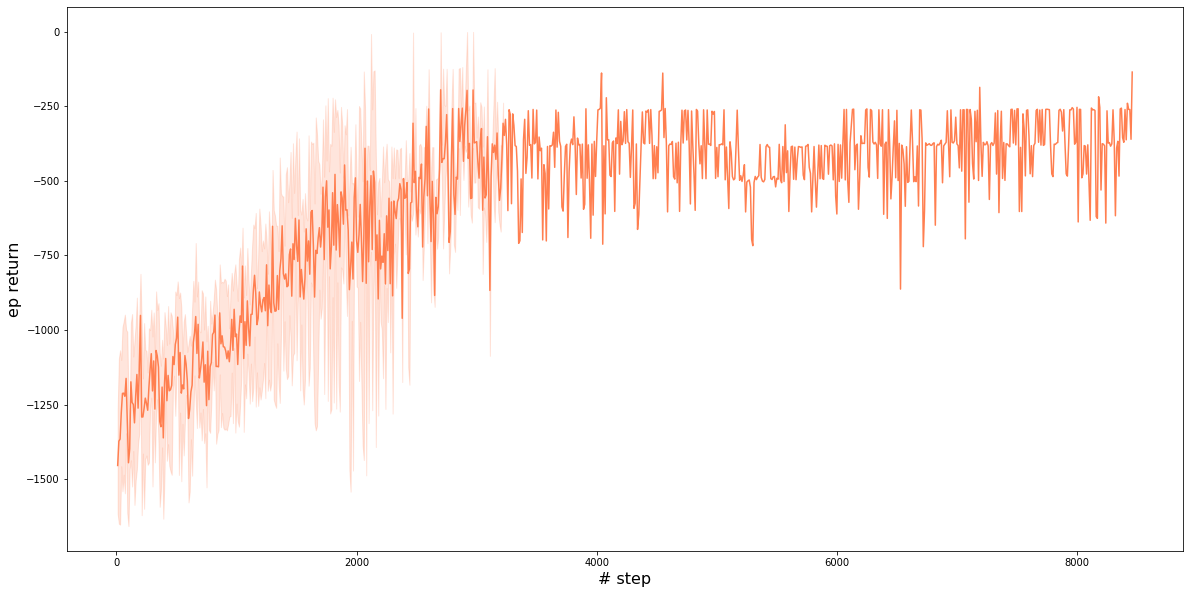

In [32]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(result["step"],result["value"],color="coral")
plt.xlabel("# step", fontsize = 16)
plt.ylabel("ep return", fontsize = 16)
plt.show()

In [33]:
print(pd_list[0])

     Unnamed: 0     wall_time  step        value
0             0  1.585551e+09    10 -1564.704834
1             1  1.585551e+09    20  -999.513489
2             2  1.585551e+09    30 -1496.000977
3             3  1.585551e+09    40  -966.839661
4             4  1.585551e+09    50  -894.569336
..          ...           ...   ...          ...
187         187  1.585557e+09  1880  -126.531174
188         188  1.585557e+09  1890  -466.571198
189         189  1.585557e+09  1900  -251.447403
190         190  1.585557e+09  1910  -247.956848
191         191  1.585557e+09  1920  -128.324539

[192 rows x 4 columns]
